# Note

In [147]:
%%javascript

IPython.tab_as_tab_everywhere = function(use_tabs) {
    if (use_tabs === undefined) {
        use_tabs = true; 
    }

    // apply setting to all current CodeMirror instances
    IPython.notebook.get_cells().map(
        function(c) {  return c.code_mirror.options.indentWithTabs=use_tabs;  }
    );
    // make sure new CodeMirror instances created in the future also use this setting
    CodeMirror.defaults.indentWithTabs=use_tabs;

    };

IPython.tab_as_tab_everywhere()

<IPython.core.display.Javascript object>

In [152]:
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

import numpy as np
import time


import numpy as np
import pandas as pd
import geopandas
import os
#from sklearn.metrics import pairwise_distances
import seaborn as sns

import numpy as np
import glob

from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
#jtplot.style()

#jtplot.style(theme='onedork')
jtplot.reset()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline



#jtplot.reset()
km_constant = 110.567

In [167]:
polygons = geopandas.read_file(os.path.join('data/data_stages/bogota/raw/', 'geo', 'sectores-utf8.shp'))
# Polygon Info
polygons_info = pd.read_csv(os.path.join('data/data_stages/bogota/raw/', 'geo', 'informacion_sectores.csv'))
#polygons_info['CODIGO FINAL'] = polygons_info['CODIGO FINAL'].astype(str)
#polygons_info = polygons_info[['CODIGO FINAL','TOTAL']].groupby('CODIGO FINAL').sum().reset_index()

In [168]:
polygons_info.sort_values('TOTAL', ascending = False)

,CODIGO FINAL,Hombre,Mujer,TOTAL,0 a 9 años,10 a 19 años,20 a 29 años,30 a 39 años,40 a 49 años,50 a 59 años,60 a 69 años,70 a 79 años,80 años o más,AyunoSi,AyunoNO,LimSI,LimNO,Prejardin,Jardin,Trans,Primaria1,Primaria2,Primaria3,Primaria4,Primaria5,Secundaria6,Secundaria7,Secundaria8,Secundaria9,Media10,Media 11,Superior,Ninguno,LEERSI,LEERNO,DESEMPLEADOS
227,1100114526,39900,40821,80721,18153,16543,13842,12279,10266,5728,2564,930,416,5857,68098,4145,76576,966,1238,2037,3267,3887,4507,3815,12127,4115,4614,4457,4426,2344,9672,2922,4855,62809,6490,2687
421,1100119215,31723,33470,65193,13334,12257,12625,10334,8335,5080,2079,888,261,3768,59509,3135,62058,971,956,1325,2025,2847,3163,2766,9677,3064,3625,3348,3895,1890,11187,5654,3177,54899,4724,2766
370,1100115636,26118,30625,56743,8205,9888,9408,9508,10590,5434,2161,1092,457,1133,54424,3460,53283,1288,853,1087,1086,1181,1303,1240,2986,1521,1716,1777,2130,1379,9014,24269,752,51567,2045,2216
363,1100115629,25308,27404,52712,9931,9145,9984,9327,7280,4069,1825,848,303,1904,49062,2378,50334,902,897,1089,1410,1839,1901,1563,5299,2038,2391,2734,2936,1552,9911,10161,1631,45349,2936,2081
229,1100114528,25849,26822,52671,11003,10243,9884,8308,6043,3895,2091,907,297,2580,50045,2547,50124,701,906,1140,1902,2587,2892,2290,8162,2765,3183,3122,3363,1594,8432,3571,2915,45397,4148,2517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1100112426,6,3,9,2,1,2,0,1,1,2,0,0,0,9,1,8,0,0,0,1,1,0,2,0,0,0,0,1,0,1,2,0,8,0,1
213,1100112412,3,2,5,1,1,1,2,0,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,4,0,0
433,1100115112,2,3,5,0,1,0,1,2,0,1,0,0,0,5,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,5,0,0
474,1100116101,1,2,3,0,0,1,1,0,1,0,0,0,0,3,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,3,0,0


Text(0, 0.5, 'Porcentaje')

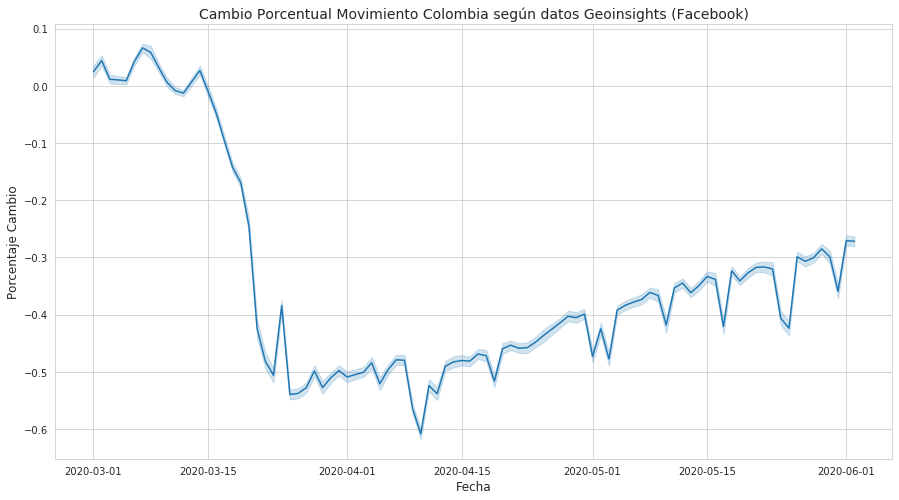

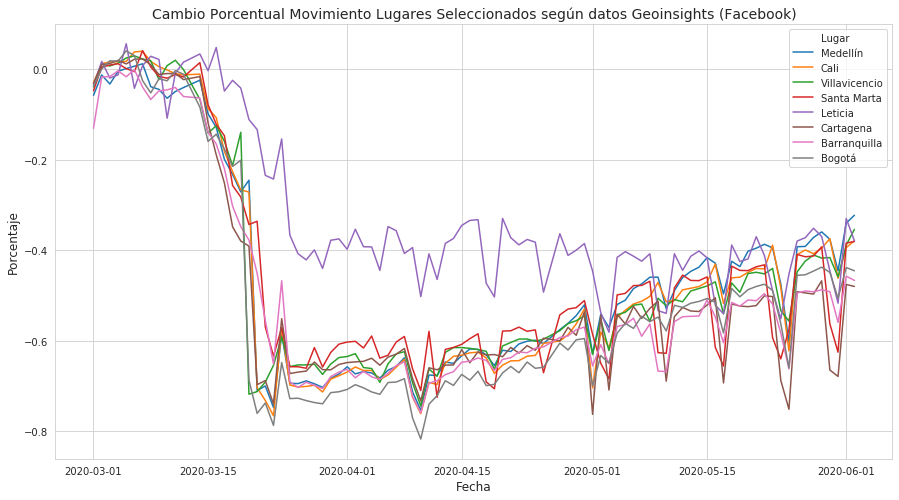

In [146]:
import pandas as pd
import os, sys

location_name = 'Colombia'
location_folder = 'colombia'

unified_folder = 'data/data_stages/colombia/unified/'


def clean_name(s):
    
    d = {}
    d['Santaf- de Bogot-'] = 'Bogotá'
    d['Medell-n'] = 'Medellín'
    d['Santiago de Cali'] = 'Cali'
    d['Cartagena de Indias'] = 'Cartagena'
    d['Santa Marta (Dist. Esp.)'] = 'Santa Marta'
    
    for k in d:
        s = s.replace(k, d[k])
        
    return(s)




# Loads the movement range
df = pd.read_csv(os.path.join(unified_folder, 'movement_range.csv'), parse_dates = ['ds'])

# Creates Polygons
# Selected places
selected = set(['Bogotá','Medellín', 'Cali','Villavicencio','Barranquilla', 'Cartagena', 'Santa Marta', 'Leticia'])

poly = df.groupby(['polygon_id','polygon_name']).size().reset_index().rename(columns = {0:'total'})
poly['Lugar'] = poly.polygon_name.apply(clean_name)
poly = poly[poly.Lugar.isin(selected)]

# Global Movmeent Plot

df_plot = df
fig = plt.figure(figsize=fig_size)
ax = sns.lineplot(data = df_plot, x = 'ds', y = 'all_day_bing_tiles_visited_relative_change')
ax.set_title('Cambio Porcentual Movimiento {} según datos Geoinsights (Facebook)'.format(location_name), fontsize=suptitle_font_size)
ax.set_xlabel('Fecha', fontsize=axis_font_size)
ax.set_ylabel('Porcentaje Cambio', fontsize=axis_font_size)
#ax.legend().texts[0].set_text("Unidad de Control")


# Selected Movement Plot
df_plot = df.merge(poly, on = 'polygon_id')

fig = plt.figure(figsize=fig_size)
ax = sns.lineplot(data = df_plot, x = 'ds', y = 'all_day_bing_tiles_visited_relative_change', hue = 'Lugar')
ax.set_title('Cambio Porcentual Movimiento Lugares Seleccionados según datos Geoinsights (Facebook)'.format(location_name), fontsize=suptitle_font_size)
ax.set_xlabel('Fecha', fontsize=axis_font_size)
ax.set_ylabel('Porcentaje', fontsize=axis_font_size)


In [142]:
selected = set(['Bogotá','Medellín', 'Cali','Villavicencio','Barranquilla', 'Cartagena', 'Santa Marta', 'Leticia'])

poly = df.groupby(['polygon_id','polygon_name']).size().reset_index().rename(columns = {0:'total'})
poly['Lugar'] = poly.polygon_name.apply(clean_name)
poly[poly.Lugar.isin(selected)]

,polygon_id,polygon_name,total,Lugar
66,9983,Leticia,92,Leticia
115,10076,Santaf- de Bogot-,92,Bogotá
188,10201,Villavicencio,92,Villavicencio
307,10442,Medell-n,92,Medellín
433,10707,Barranquilla,92,Barranquilla


,polygon_id,polygon_name,total,Lugar
66,9983,Leticia,92,Leticia


In [110]:
df = pd.read_csv(os.path.join(unified_folder, 'movement_range.csv'), parse_dates = ['ds'])
df_plot = df

Text(0, 0.5, 'Porcentaje')

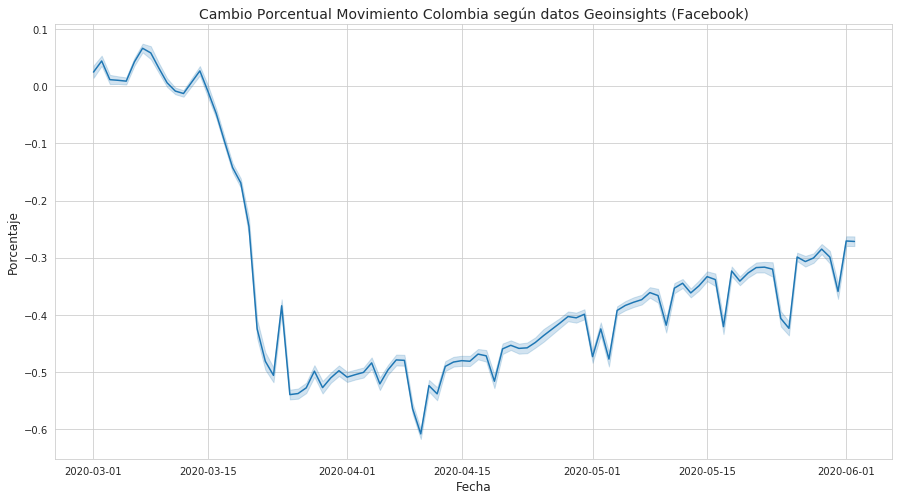

In [116]:
fig = plt.figure(figsize=fig_size)
ax = sns.lineplot(data = df_plot, x = 'ds', y = 'all_day_bing_tiles_visited_relative_change')
ax.set_title('Cambio Porcentual Movimiento Colombia según datos Geoinsights (Facebook)'.format(location_name), fontsize=suptitle_font_size)
ax.set_xlabel('Fecha', fontsize=axis_font_size)
ax.set_ylabel('Porcentaje', fontsize=axis_font_size)
#ax.legend().texts[0].set_text("Unidad de Control")

Text(0, 0.5, 'Porcentaje')

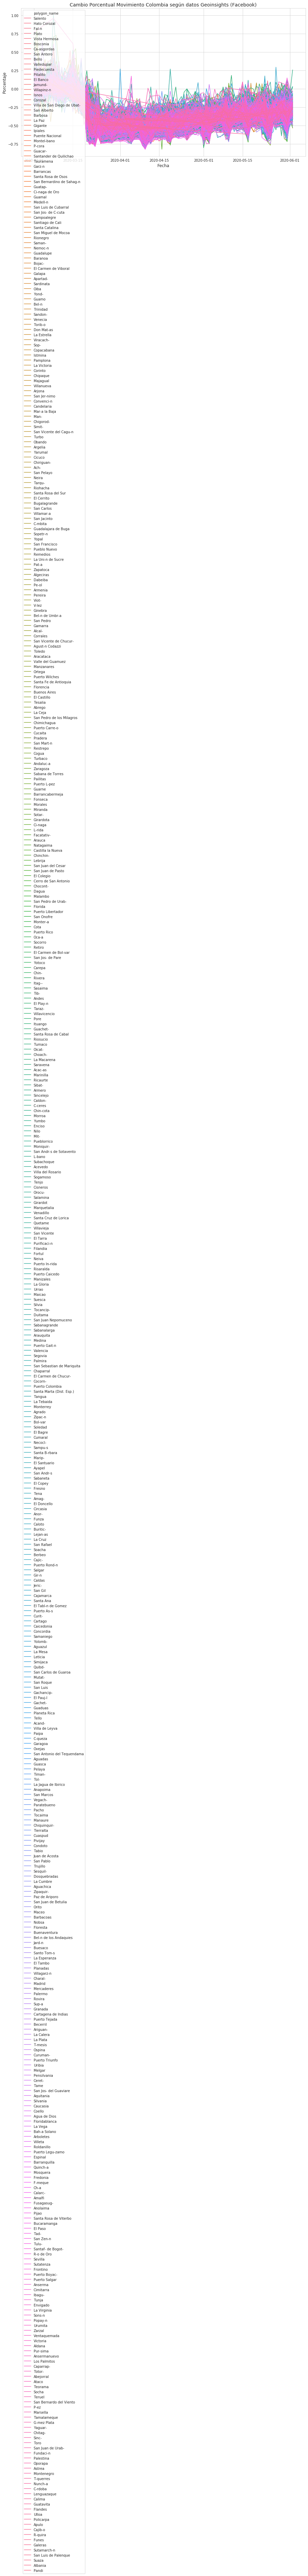

In [118]:
fig = plt.figure(figsize=fig_size)
ax = sns.lineplot(data = df_plot, x = 'ds', y = 'all_day_bing_tiles_visited_relative_change', hue = 'polygon_name')
ax.set_title('Cambio Porcentual Movimiento Colombia según datos Geoinsights (Facebook)'.format(location_name), fontsize=suptitle_font_size)
ax.set_xlabel('Fecha', fontsize=axis_font_size)
ax.set_ylabel('Porcentaje', fontsize=axis_font_size)
#ax.legend().texts[0].set_text("Unidad de Control")

In [115]:
agglomerated_folder_location = 'data/data_stages/colombia/agglomerated/community/'
ident = '   '
location_name = 'Colombia'
fig_size = (15,8)
suptitle_font_size = 14
individual_plot_size = 12
axis_font_size = 12
max_selected = 12

In [99]:
# Change Function
def get_percentage_difference(df, smooth_days = 1):
    
    
    df.sort_values('date_time', inplace = True)
    base_line = np.mean(df['movement'].values[0:(min(3,df.shape[0]))])
    df['movement_change'] = 100*(df['movement'] - base_line)/base_line    
    df['movement_change'] = df['movement_change'].rolling(smooth_days, min_periods=1).mean()
    
    return(df)


# Loads the data
print(ident + '      Extracts the movement for {}'.format(location_name))
df_movement = pd.read_csv(os.path.join(agglomerated_folder_location, 'movement.csv'), parse_dates = ['date_time'])
polygons = pd.read_csv(os.path.join(agglomerated_folder_location, 'polygons.csv'))
df_cases = pd.read_csv(os.path.join(agglomerated_folder_location, 'cases.csv'), parse_dates = ['date_time'])


polygons = polygons.sort_values('num_cases', ascending = False)
polygons.loc[polygons.index[max_selected:],'poly_name'] = 'Otros (Promedio)'

# Adds the name to the movement
df_movement = df_movement.merge(polygons[['poly_id','poly_name']], left_on = 'start_poly_id', right_on = 'poly_id').rename(columns = {'poly_name':'start_poly_name'})
df_movement = df_movement.merge(polygons[['poly_id','poly_name']], left_on = 'end_poly_id', right_on = 'poly_id').rename(columns = {'poly_name':'end_poly_name'})

df_cases = df_cases.merge(polygons[['poly_id','poly_name']], on = 'poly_id')

         Extracts the movement for Colombia


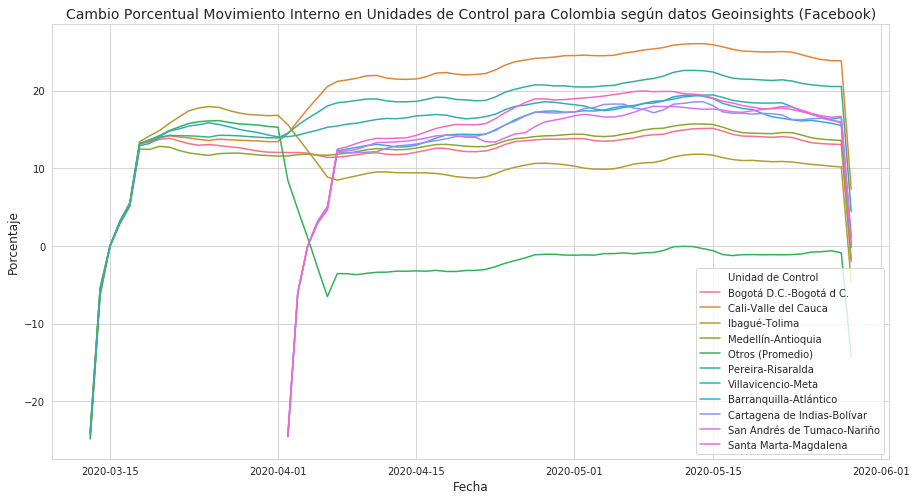

In [100]:
fig = plt.figure(figsize=fig_size)
df_plot = df_movement.loc[df_movement.start_poly_id == df_movement.end_poly_id, ['date_time','start_poly_name', 'movement']].groupby(['date_time','start_poly_name']).mean().reset_index()

df_plot = df_plot.groupby('start_poly_name').apply(lambda df: get_percentage_difference(df, 5)).dropna()


ax = sns.lineplot(data = df_plot, x = 'date_time', y = 'movement_change', hue = 'start_poly_name')
ax.set_title('Cambio Porcentual Movimiento Interno en Unidades de Control para {} según datos Geoinsights (Facebook)'.format(location_name), fontsize=suptitle_font_size)
ax.set_xlabel('Fecha', fontsize=axis_font_size)
ax.set_ylabel('Porcentaje', fontsize=axis_font_size)
ax.legend().texts[0].set_text("Unidad de Control")

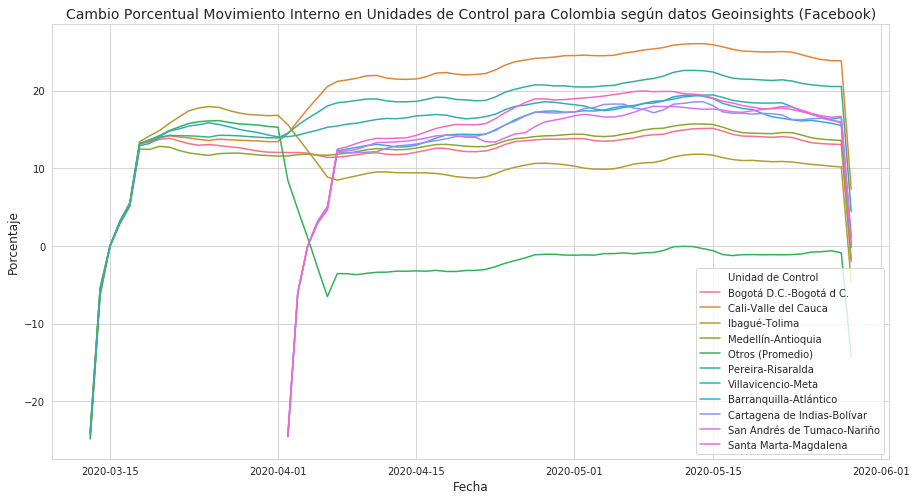

In [101]:
fig = plt.figure(figsize=fig_size)
df_plot = df_movement.loc[df_movement.start_poly_id == df_movement.end_poly_id, ['date_time','start_poly_name', 'movement']].groupby(['date_time','start_poly_name']).mean().reset_index()

df_plot = df_plot.groupby('start_poly_name').apply(lambda df: get_percentage_difference(df, 5)).dropna()


ax = sns.lineplot(data = df_plot, x = 'date_time', y = 'movement_change', hue = 'start_poly_name')
ax.set_title('Cambio Porcentual Movimiento Interno en Unidades de Control para {} según datos Geoinsights (Facebook)'.format(location_name), fontsize=suptitle_font_size)
ax.set_xlabel('Fecha', fontsize=axis_font_size)
ax.set_ylabel('Porcentaje', fontsize=axis_font_size)
ax.legend().texts[0].set_text("Unidad de Control")

         Plots External Movement


NameError: name 'export_folder_location' is not defined

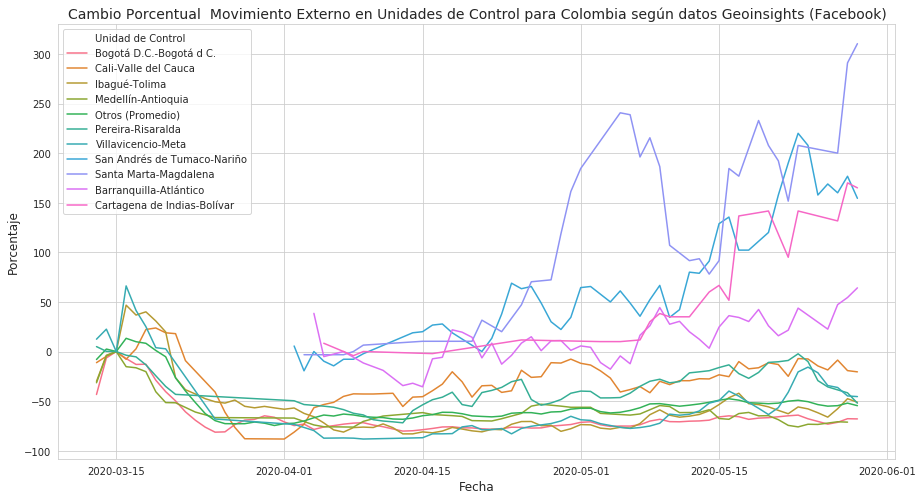

In [103]:

# Plots External movement all
print(ident + '      Plots External Movement')

fig = plt.figure(figsize=fig_size)
df_plot = df_movement.loc[df_movement.start_poly_id != df_movement.end_poly_id, ['date_time','start_poly_name', 'movement']].groupby(['date_time','start_poly_name']).mean().reset_index()

df_plot = df_plot.groupby('start_poly_name').apply(lambda df: get_percentage_difference(df, 5)).dropna()

ax = sns.lineplot(data = df_plot, x = 'date_time', y = 'movement_change', hue = 'start_poly_name')
ax.set_title('Cambio Porcentual  Movimiento Externo en Unidades de Control para {} según datos Geoinsights (Facebook)'.format(location_name), fontsize=suptitle_font_size)
ax.set_xlabel('Fecha', fontsize=axis_font_size)
ax.set_ylabel('Porcentaje', fontsize=axis_font_size)
ax.legend().texts[0].set_text("Unidad de Control")

fig.savefig(os.path.join(export_folder_location,'external_movement_selected_polygons_{}.png'.format(location_folder)))


In [2]:


# Restores to non cumulative
for geo_id in df_cases.geo_id.unique():

    val = df_cases[df_cases.geo_id == geo_id].num_cases.values
    new_val = val - np.roll(val, 1)
    new_val[0] = val[0]
    df_cases.loc[df_cases.geo_id == geo_id,'num_cases'] = new_val


return(df_cases)



In [11]:
# Loads the data
shape_file = 'data/data_stages/colombia/raw/geo/Municpios_Dane_2017.shp'
shape_file_info = 'data/data_stages/colombia/raw/geo/municipios_db.csv'

In [13]:


polygons = geopandas.read_file(shape_file)
polygons_info = pd.read_csv(shape_file_info)

# Polygons
polygons = polygons[['Codigo_Dan','Shape_Area','geometry','Total_2018']].rename(columns = {'Codigo_Dan':'poly_id','Shape_Area':'area', 'Total_2018': 'population' })
polygons.poly_id = polygons.poly_id.astype(int)

# Polygon Info
polygons_info['poly_name'] = polygons_info.apply(lambda row: '{}-{}'.format(row.muni_name, row.dep_name), axis = 1)
polygons_info = polygons_info[['muni_id','poly_name']].rename(columns = {'muni_id':'poly_id'})
polygons_final = polygons.merge(polygons_info, on = 'poly_id')

# Extracts the center
polygons_final['poly_lon'] = polygons_final.geometry.centroid.x
polygons_final['poly_lat'] = polygons_final.geometry.centroid.y

# Converts to string
polygons_final['poly_id'] = polygons_final['poly_id'].astype(str)

polygons_final


,poly_id,area,geometry,population,poly_name,poly_lon,poly_lat
0,5467,9.560439e+07,"POLYGON ((834479.411 1157896.499, 834511.481 1...",5825.0,Montebello-Antioquia,8.389666e+05,1.147764e+06
1,5475,1.246806e+09,"POLYGON ((713271.562 1269173.628, 713286.189 1...",4891.0,Murindó-Antioquia,7.091170e+05,1.247603e+06
2,5480,1.140242e+09,"POLYGON ((733448.227 1327312.596, 733432.222 1...",22028.0,Mutatá-Antioquia,7.335600e+05,1.304191e+06
3,5266,8.061037e+07,"POLYGON ((844130.008 1176411.448, 844154.320 1...",238173.0,Envigado-Antioquia,8.374221e+05,1.172423e+06
4,5483,3.176878e+08,"POLYGON ((870771.822 1119962.751, 870807.634 1...",17891.0,Nariño-Antioquia,8.762077e+05,1.109057e+06
...,...,...,...,...,...,...,...
1117,97889,4.697235e+09,"POLYGON ((1454658.844 552386.480, 1448299.610 ...",1226.0,Yavaraté-Vaupés,1.497139e+06,5.836082e+05
1118,99001,1.224123e+10,"POLYGON ((1698922.296 1193595.360, 1698936.168...",16504.0,Puerto Carreño-Vichada,1.658173e+06,1.140474e+06
1119,99524,2.021574e+10,"POLYGON ((1559216.945 1179280.462, 1559607.066...",17026.0,La Primavera-Vichada,1.485958e+06,1.098142e+06
1120,99624,1.990817e+09,"POLYGON ((1381111.505 1089754.313, 1381112.010...",4197.0,Santa Rosalía-Vichada,1.361270e+06,1.044198e+06


In [15]:
polygons_final.to_crs({'init': 'epsg:4326'}) 

,poly_id,area,geometry,population,poly_name,poly_lon,poly_lat
0,5467,9.560439e+07,"POLYGON ((-75.57243 6.02200, -75.57214 6.02191...",5825.0,Montebello-Antioquia,8.389666e+05,1.147764e+06
1,5475,1.246806e+09,"POLYGON ((-76.67171 7.02309, -76.67158 7.02297...",4891.0,Murindó-Antioquia,7.091170e+05,1.247603e+06
2,5480,1.140242e+09,"POLYGON ((-76.49209 7.54930, -76.49221 7.54646...",22028.0,Mutatá-Antioquia,7.335600e+05,1.304191e+06
3,5266,8.061037e+07,"POLYGON ((-75.48573 6.18960, -75.48551 6.18901...",238173.0,Envigado-Antioquia,8.374221e+05,1.172423e+06
4,5483,3.176878e+08,"POLYGON ((-75.24399 5.67984, -75.24367 5.67958...",17891.0,Nariño-Antioquia,8.762077e+05,1.109057e+06
...,...,...,...,...,...,...,...
1117,97889,4.697235e+09,"POLYGON ((-69.99653 0.54682, -70.05347 0.61077...",1226.0,Yavaraté-Vaupés,1.497139e+06,5.836082e+05
1118,99001,1.224123e+10,"POLYGON ((-67.77352 6.30854, -67.77341 6.30718...",16504.0,Puerto Carreño-Vichada,1.658173e+06,1.140474e+06
1119,99524,2.021574e+10,"POLYGON ((-69.03111 6.19334, -69.02761 6.19239...",17026.0,La Primavera-Vichada,1.485958e+06,1.098142e+06
1120,99624,1.990817e+09,"POLYGON ((-70.64082 5.39812, -70.64125 5.31941...",4197.0,Santa Rosalía-Vichada,1.361270e+06,1.044198e+06


In [ ]:
num_recovered	num_infected	num_diseased	num_infected_in_hospital	num_infected_in_house


In [31]:
df.attention.value_counts()

Casa            16342
Recuperado       6665
Hospital         1263
Fallecido         822
Hospital UCI      233
Name: attention, dtype: int64

In [44]:

# Necesary imports
import pandas as pd
import numpy as np
from pathlib import Path
import os
import json
import time
import geo_functions as geo

import fb_functions as fb

import extraction_functions as ext_fun

In [45]:
global_dir = ''

In [64]:
data_dir = os.path.join(global_dir, 'data/data_stages/germany')


df_description = pd.read_csv(os.path.join(data_dir, 'description.csv'), index_col = 0)
df_description.loc['type','value']

'country'

In [ ]:

# Cases File Name
cases_file_name = 'cases_germany.csv'
cases_file_location = os.path.join(data_dir, 'raw', 'cases', cases_file_name)

#Geo File
geo_file_name = 'ags.json'
geo_file_location = os.path.join(data_dir, 'raw', 'geo', geo_file)


# Repository and cases folders
repository_name = 'COVID-19-GERMANY'
respository_folder = os.path.join(global_dir, 'data/git_repositories/{}/'.format(repository_name))

# Cases in repository
cases_in_repository = os.path.join(respository_folder, 'cases-rki-by-ags.csv')
geo_in_repository = os.path.join(respository_folder, 'ags.json')

In [59]:


data_dir = os.path.join(global_dir, 'data/data_stages/brazil')


# Cases File Name
cases_file_name = 'brazil_cases.csv'
cases_file_location = os.path.join(data_dir, 'raw', 'cases', cases_file_name)

#Geo File
geo_file = 'brazil_geo.csv'
geo_file_location = os.path.join(data_dir, 'raw', 'geo', geo_file)


# Repository and cases folders
repository_name = 'COVID-19-BRAZIL'
respository_folder = os.path.join(global_dir, 'data/git_repositories/{}/'.format(repository_name))

# Cases in repository
cases_in_repository = os.path.join(respository_folder, 'cases-brazil-cities-time_changesOnly.csv')
geo_in_repository = os.path.join(respository_folder, 'gps_cities.csv')



# Cleaning functions for the city and the state
def clean_name(name):
	'''
	Removes non essential characters from string
	'''

	name = name.split("/")[0]
	return(name)




def build_cases():
	'''
	Loads the cases downloaded from repository
	'''
	
	df = pd.read_csv(cases_file_location, parse_dates = ["date"])
	df = df[["date","newCases", "ibgeID"]].rename(columns = {'date':'date_time', 'newCases':'num_cases', "ibgeID":'geo_id'})

	# Removes fake ids and negative
	df = df[df.geo_id.apply(lambda geo: len(str(geo)) > 3)].copy()
	df = df[df.num_cases > 0].copy()
	
	return(df)



def build_cases_geo():
	'''
	Geolocated cases
	'''

	df = build_cases()

	# Loads Geo
	df_geo = pd.read_csv(geo_file_location)
	df_geo = df_geo[['ibgeID','id','lon','lat']].rename(columns = {'ibgeID':'geo_id','id':'location'})
	df_geo.location = df_geo.location.apply(clean_name)

	df_final = df.merge(df_geo, on = 'geo_id').sort_values('date_time')
	
	return(df_final)



def build_polygons():
	'''
	Current implementation of polygons
	'''

	return(build_polygons_form_cases())


def build_polygons_from_cases():
	'''
	Builds polygons from the geolocated cases
	'''
	df_cases = build_cases_geo()
	df_cases = df_cases[['geo_id', 'location','lon', 'lat']].drop_duplicates().rename(columns = {'geo_id':'poly_id', 'location':'poly_name', 'lon':'poly_lon', 'lat':'poly_lat'})
	return(df_cases)






In [61]:
build_cases_geo()

,date_time,num_cases,geo_id,location,lon,lat
0,2020-02-25,1,3550308,São Paulo,-46.633382,-23.550651
1,2020-02-28,1,3550308,São Paulo,-46.633382,-23.550651
2,2020-03-04,1,3550308,São Paulo,-46.633382,-23.550651
77,2020-03-05,1,3300407,Barra Mansa,-44.173513,-22.539484
3,2020-03-05,3,3550308,São Paulo,-46.633382,-23.550651
...,...,...,...,...,...,...
34535,2020-05-27,1,1706506,Darcinópolis,-47.752428,-6.708596
34542,2020-05-27,1,3514106,Dois Córregos,-48.384532,-22.369755
24325,2020-05-27,1,4204004,Catanduvas,-51.660158,-27.068972
38810,2020-05-27,1,4219101,Vargeão,-52.154497,-26.861277


,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source
0,2020-02-25,Brazil,SP,São Paulo/SP,3550308,0,0,1,1,0.00000,0.00816,0.00000,SES
1,2020-02-25,Brazil,TOTAL,TOTAL,0,0,0,1,1,0.00000,0.00048,0.00000,NaN
2,2020-02-28,Brazil,SP,São Paulo/SP,3550308,0,0,1,2,0.00000,0.01632,0.00000,SES
3,2020-02-28,Brazil,TOTAL,TOTAL,0,0,0,1,2,0.00000,0.00095,0.00000,NaN
4,2020-03-04,Brazil,SP,São Paulo/SP,3550308,0,0,1,3,0.00000,0.02449,0.00000,SES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42442,2020-05-28,Brazil,RR,CASO SEM LOCALIZAÇÃO DEFINIDA/RR,14,0,1,277,307,0.16508,50.68005,0.00326,TW
42443,2020-05-28,Brazil,SC,CASO SEM LOCALIZAÇÃO DEFINIDA/SC,42,5,5,628,670,0.06979,9.35129,0.00746,SES
42444,2020-05-28,Brazil,SP,CASO SEM LOCALIZAÇÃO DEFINIDA/SP,35,268,268,6382,6443,0.58364,14.03121,0.04160,SES
42445,2020-05-28,Brazil,TO,CASO SEM LOCALIZAÇÃO DEFINIDA/TO,17,3,3,254,254,0.19073,16.14886,0.01181,TW


In [42]:
file_name = cases_file_location

df = pd.read_csv(file_name, parse_dates = ['time_iso8601'])
df = df.rename(columns = {'time_iso8601':'date_time'})

df_cases = pd.melt(df, id_vars = ['date_time'], value_vars = df.columns[1:-1])
df_cases.columns = ['date_time','geo_id','num_cases']
df_cases.date_time = pd.to_datetime(df_cases.date_time.dt.round(freq = 'D').apply(lambda x: x.strftime('%Y-%m-%d')))

df_cases.sort_values(['date_time'], inplace = True)

# corrects wrong values
# Flattens!
for geo_id in df_cases.geo_id.unique():

	val = df_cases[df_cases.geo_id == geo_id].num_cases.values

	finished = False		
	while not finished:
		finished = True
		for i in range(1,len(val) - 1):
			if val[i] > val[i+1]:
				val[i] = int(np.floor((val[i-1] + val[i+1])/2))
				finished = False

	df_cases.loc[df_cases.geo_id == geo_id, 'num_cases'] = val


# Restores to non cumulative
for geo_id in df_cases.geo_id.unique():

	val = df_cases[df_cases.geo_id == geo_id].num_cases.values
	new_val = val - np.roll(val, 1)
	new_val[0] = val[0]
	df_cases.loc[df_cases.geo_id == geo_id,'num_cases'] = new_val




Found 173 new places. Updating

   Finding: Germany, Niedersachsen, Uelzen (3360)
      Done! Location: 52.9840679,10.538588154650403

   Finding: Germany, Baden-Württemberg, Heilbronn (8125)
      Done! Location: 49.142291,9.218655

   Finding: Germany, Mecklenburg-Vorpommern, Vorpommern-Rügen (13073)
      Done! Location: 54.2288755,12.813153282148113

   Finding: Germany, Nordrhein-Westfalen, StadtRegion Aachen (5334)
      Could not find location. Please enter it manually

   Finding: Germany, Thüringen, Sonneberg (16072)
      Done! Location: 50.3575412,11.1691714

   Finding: Germany, Mecklenburg-Vorpommern, Nordwestmecklenburg (13074)
      Done! Location: 53.80016005,11.288113691094274

   Finding: Germany, Niedersachsen, Grafschaft Bentheim (3456)
      Done! Location: 52.4647463,7.0102561

   Finding: Germany, Thüringen, Schmalkalden-Meiningen (16066)
      Done! Location: 50.7213643,10.4510467

   Finding: Germany, Bayern, Weiden i.d.OPf. (9363)
      Done! Location: 49.6752